# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness.The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.The task is to add all these factors up, to predict the happiness scores.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_report.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape  #checking the data dimension

(158, 12)

In [4]:
df.dtypes  #checking the datatypes of each column

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

As happiness rank is not useful to predict the happiness score so we can drop the column happiness rank for now. we can check the happiness rank when we predict the score.

In [5]:
df.drop(['Happiness Rank'], axis='columns', inplace=True)

In [6]:
#checking Statistical sumary
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
 #checking the null values in dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

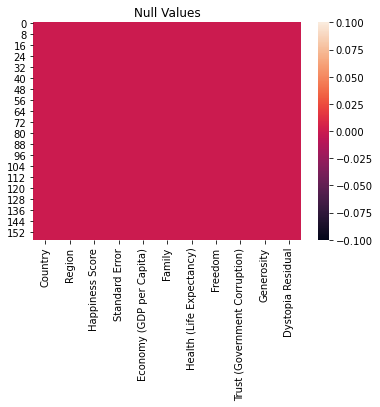

In [8]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

as we can see there is no white lines in heatmap and the sum of null values in each colum of the dataset is 0. So there is no null values in the dataset

In [9]:
df_region= df.Region.value_counts()
df_region

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

We can see that sub-saharan africa region has most number of countries in this dataset. In next step we can see this in graphical form.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

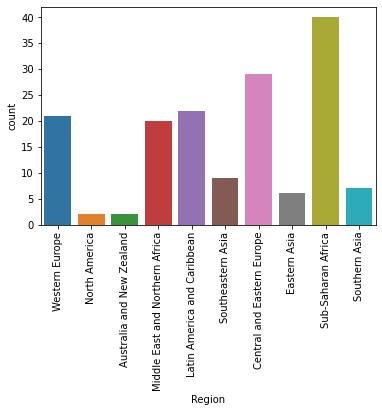

In [10]:
sns.countplot(df['Region']) 
plt.xticks(rotation=90)

Using Label_Encoder to change the Region column from object to float

In [11]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])

Checking correlation

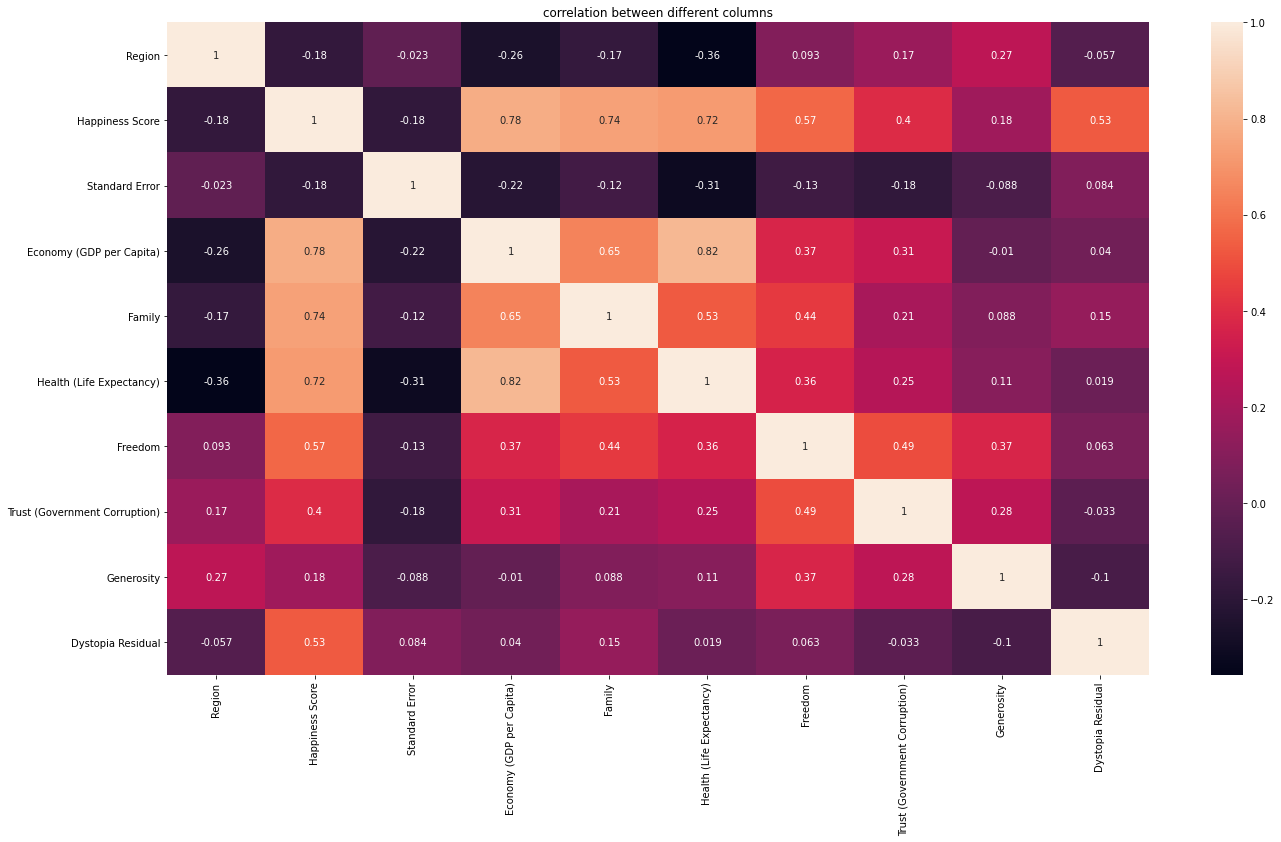

In [12]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,annot=True)
plt.title('correlation between different columns')
plt.show()

Through this heatmap we can see that economy,family,health are highly positive correlated with the happiness score. So, we can say that if a person has good wealth,health,family then the person is more happy. These three factors contributes more to be happy.

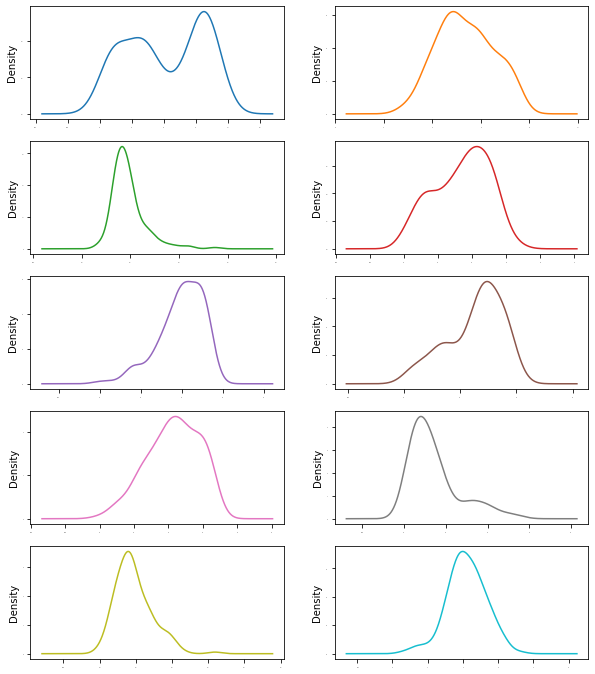

In [13]:
df.plot(kind='density',subplots=True,  layout=(5,2), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

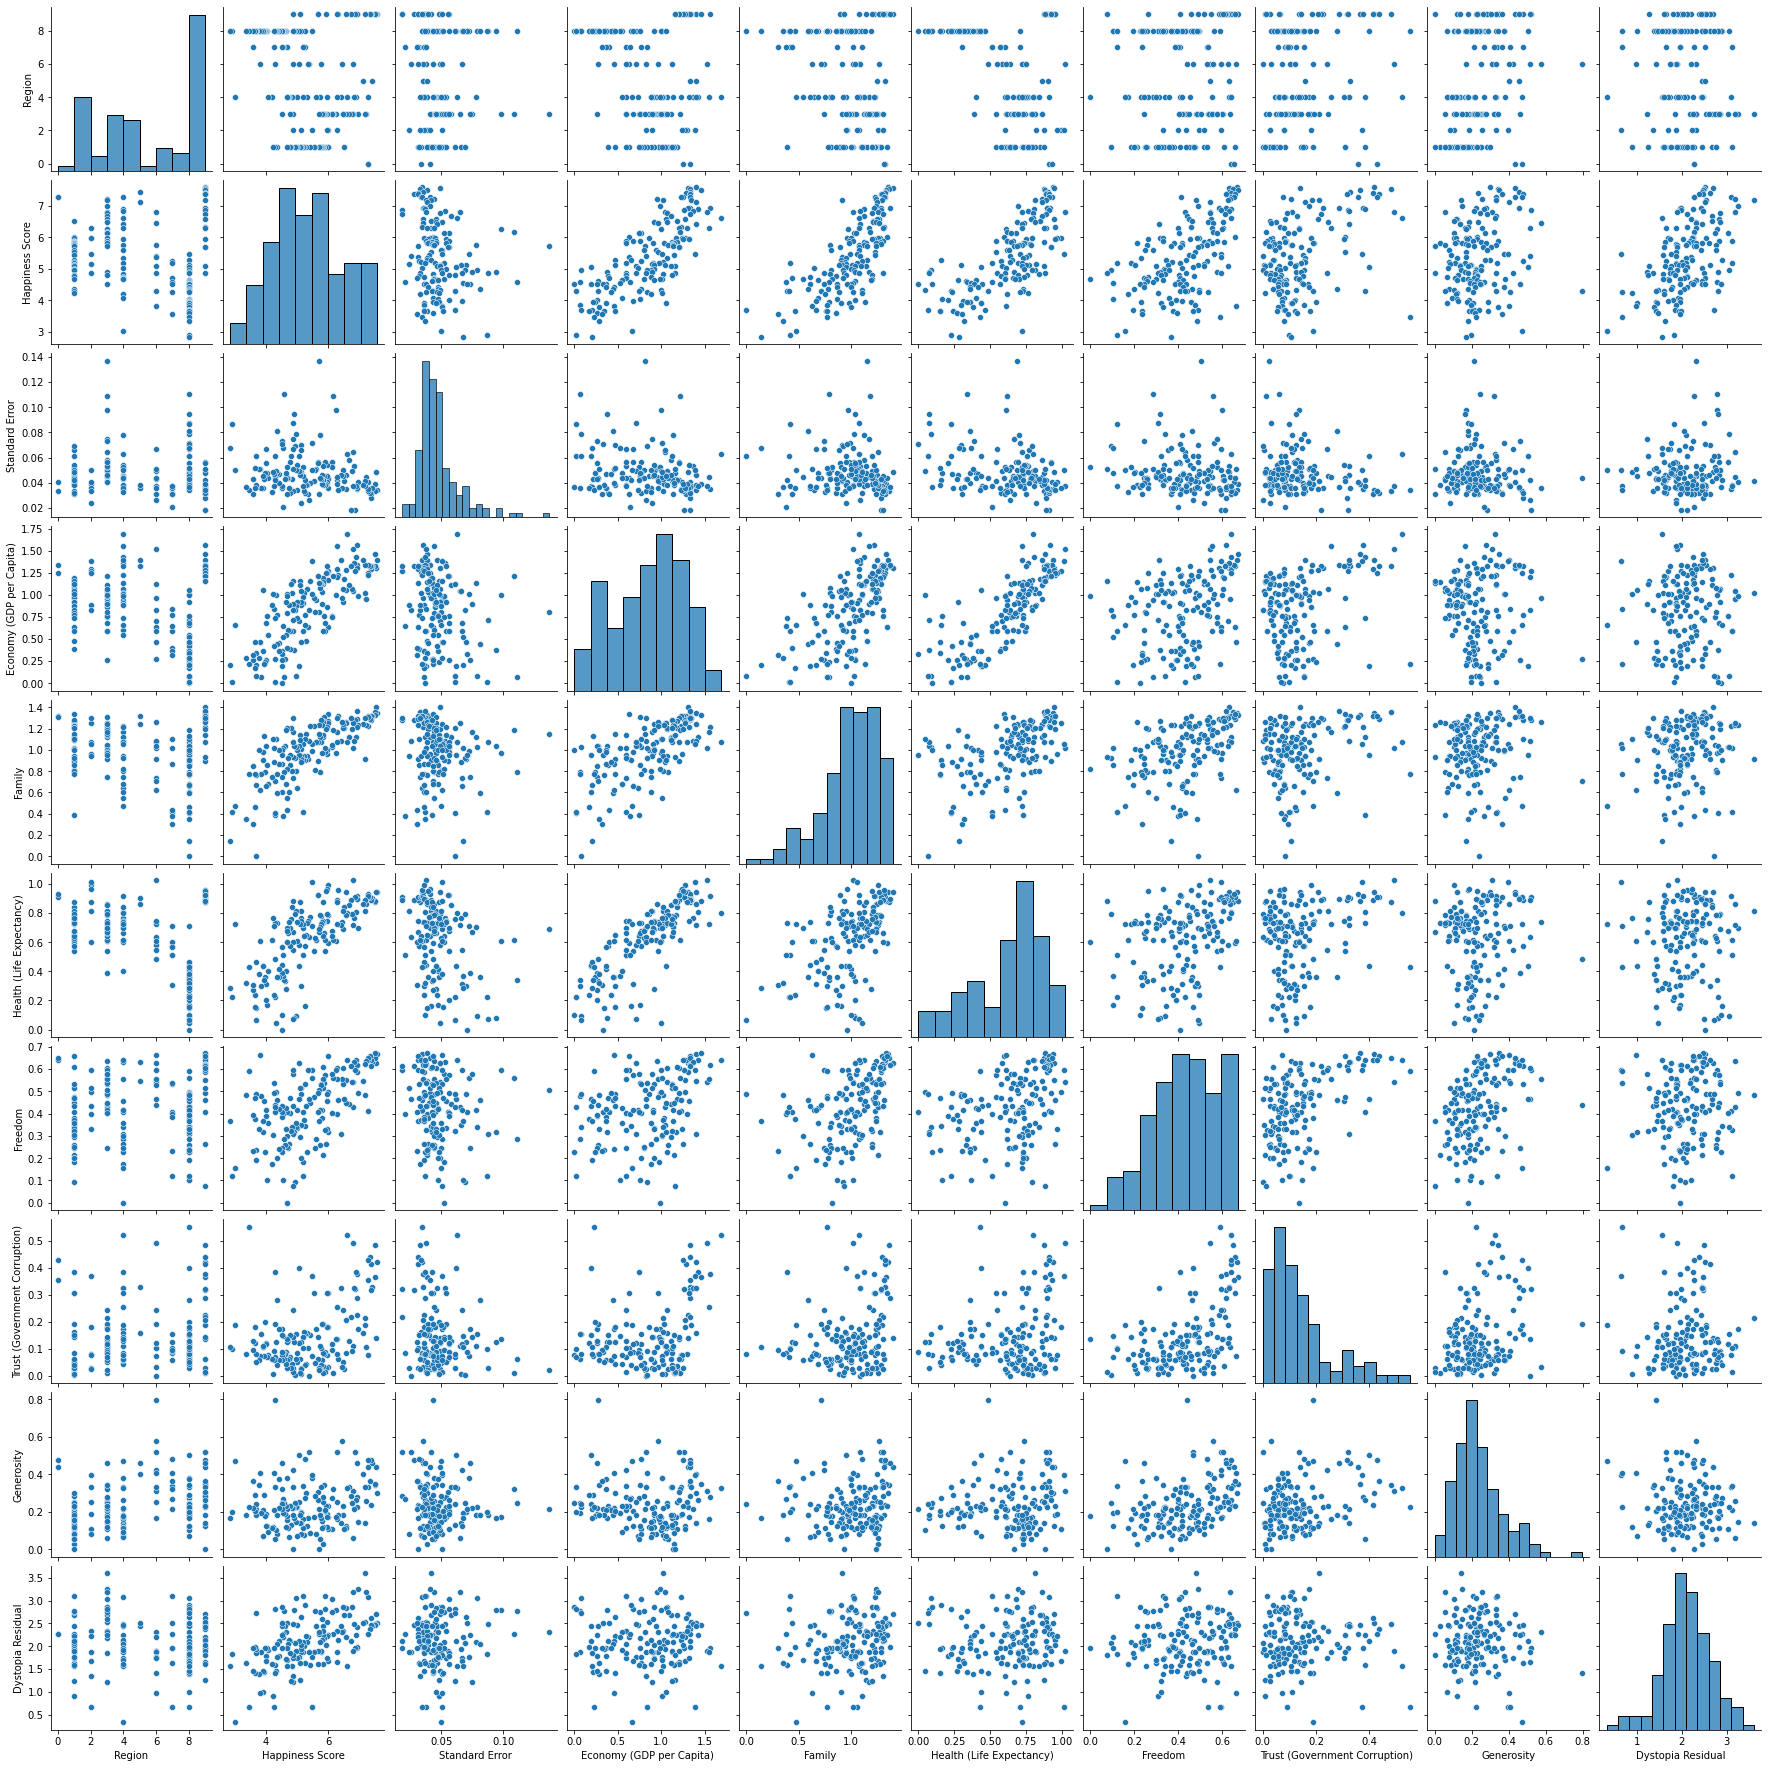

In [14]:
sns.pairplot(df)

In [15]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('Happiness Score', axis=1)
y=df['Happiness Score']

In [16]:
x=df.drop('Country',axis=1)

we can drop country and  as it is not useful in predicting the happiness score.

In [17]:
#checking skewness
x.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

As we can see that there is skewness in standard error,family,health,trust and generosity. We have to remove skewness to get better model score.

Removing Skewness

In [18]:
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [19]:
df_new.skew()

Region                          -0.228041
Happiness Score                 -0.027956
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

As we can see there is no skewness in the dataset now.

In [20]:
x=df_new

Region                              AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

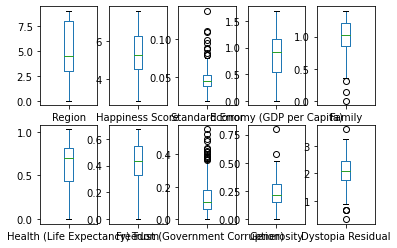

In [21]:
#checking the outliers
df.plot(kind='box', subplots=True,layout=(2,5)) 

As we can see that there are outliers in standard error,family,trust,generosity,dystopia residual. We have to remove these outliers.

Checking the Z_score

In [22]:
z=np.abs(zscore(x))
z

array([[1.24453048, 1.85703444, 0.9722262 , ..., 1.7739906 , 0.62239051,
        0.75099154],
       [1.24453048, 1.83666843, 0.30934971, ..., 0.31599326, 1.48099498,
        1.11001108],
       [1.24453048, 1.81000179, 1.06201663, ..., 1.90679206, 0.92797276,
        0.70227525],
       ...,
       [0.30300992, 2.20718029, 0.39913743, ..., 0.73891461, 1.65933595,
        2.86621553],
       [0.95510156, 2.3121775 , 1.92690191, ..., 0.15194623, 0.19482942,
        0.51480136],
       [0.95510156, 2.38132668, 1.31032295, ..., 0.06732622, 0.49041465,
        0.97664547]])

In [23]:
threshold=3
print(np.where(z>3))

(array([20, 25], dtype=int32), array([2, 2], dtype=int32))


In [24]:
X_new=x[(z<3).all(axis=1)]

In [25]:
X_new.shape

(156, 10)

As we see the outliers are removed from the dataset

In [26]:
x_new=x

In [27]:
x

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.244530,1.857034,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.244530,1.836668,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.244530,1.810002,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.244530,1.806077,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,0.030337,1.731344,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...,...
153,0.955102,-1.741699,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,0.955102,-1.866654,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,-0.303010,-2.207180,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,0.955102,-2.312178,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


In [28]:
#finding best random state
maxscore=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train,y_train)
    predli=li.predict(x_test)
    score=r2_score(predli,y_test)
    if score>maxscore:
        maxscore=score
        maxrs=i
print('best score is ',maxscore,'on random state is',i)

best score is  0.9996742765628482 on random state is 199


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=199)

Testing the best Random State in different algorithms

In [30]:
li=LinearRegression()
li.fit(x_train,y_train)
pred=li.predict(x_test)
print('R2_score is:',r2_score(pred,y_test))
print('Mean squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(pred,y_test)))

R2_score is: 0.9990682335317529
Mean squared error: 0.0009493706620950933
Mean absolute error: 0.02354681597882899
Root Mean Squared Error: 0.030811859114553496


In [31]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('R2_score is:',r2_score(pred,y_test))
print('Mean squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(pred,y_test)))

R2_score is: 0.9906680071726675
Mean squared error: 0.0089304764343749
Mean absolute error: 0.03637593750000073
Root Mean Squared Error: 0.09450119805788126


In [32]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2_score is:',r2_score(pred,y_test))
print('Mean squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(pred,y_test)))

R2_score is: 0.997661252909425
Mean squared error: 0.0023703125000000052
Mean absolute error: 0.036875000000000144
Root Mean Squared Error: 0.04868585523537617


In [33]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score is:',r2_score(pred,y_test))
print('Mean squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(pred,y_test)))

R2_score is: 0.9342043461930217
Mean squared error: 0.05318907705958079
Mean absolute error: 0.16640809851901595
Root Mean Squared Error: 0.2306275722015492


Now Checking Cross Validation Score

In [34]:
scrli=cross_val_score(li,x,y, cv=5)
print('cross validation score of linearregression: ',scrli.mean())

cross validation score of linearregression:  0.9650284950423034


In [35]:
scrrf=cross_val_score(rf,x,y, cv=5)
print(scrrf)
print('cross validation score of RandomForestregression: ',scrrf.mean())

[-3.84681262 -0.194132   -0.40806012 -0.95210207 -2.26191348]
cross validation score of RandomForestregression:  -1.5326040603990703


In [36]:
scrdtr=cross_val_score(dtr,x,y, cv=5)
print(scrdtr)
print('cross validation score of RandomForestregression: ',scrdtr.mean())

[-3.07835604  0.01462764 -0.25093839 -0.7863878  -2.01771835]
cross validation score of RandomForestregression:  -1.2237545877786582


In [37]:
scrsvr=cross_val_score(svr,x,y, cv=5)
print(scrsvr)
print('cross validation score of RandomForestregression: ',scrsvr.mean())

[-11.78614639   0.4108259    0.79419117   0.06653207  -5.24205513]
cross validation score of RandomForestregression:  -3.1513304769557964


AS I see there is overfittibg in the rf,dtr,svr. So the solution to avoid overfitting is to use Linear model.

Minimum difference in r2_score and cross validation score is for Linear Regression (3.4) so it is our best model

Doing GridSearchCV for getting best parameters

In [38]:
#creating parameter list to pass in GridSearchCV
parameters= {'fit_intercept': ['True','False'],
             'normalize': ['True','False'],
             'copy_X': ['True','False'],
             'n_jobs': np.arange(-5,5)}

In [39]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]),
                         'normalize': ['True', 'False']})

In [41]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -5, 'normalize': 'True'}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [43]:
r2_score(GCV_pred,y_test)

0.9990682335317529

In [44]:
joblib.dump(GCV.best_estimator_,'WorldHappinessReportLI.pkl')

['WorldHappinessReportLI.pkl']